In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

Loading the csv file into a dataframe

In [3]:
df = pd.read_csv('../data/raw/output_file.csv')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581642 entries, 0 to 1581641
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1581642 non-null  object 
 1   Time                   1581642 non-null  object 
 2   Global_active_power    1581641 non-null  object 
 3   Global_reactive_power  1581641 non-null  object 
 4   Voltage                1581641 non-null  object 
 5   Global_intensity       1581641 non-null  object 
 6   Sub_metering_1         1581641 non-null  object 
 7   Sub_metering_2         1581641 non-null  object 
 8   Sub_metering_3         1573291 non-null  float64
dtypes: float64(1), object(8)
memory usage: 108.6+ MB


Most columns are object type → even numeric ones (like Global_active_power, Voltage, etc.), which means they’re being read as strings instead of floats.

In [7]:
#Convert numeric columns from object → float
df.columns



Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
numeric_columns = ['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581642 entries, 0 to 1581641
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1581642 non-null  object 
 1   Time                   1581642 non-null  object 
 2   Global_active_power    1573291 non-null  float64
 3   Global_reactive_power  1573291 non-null  float64
 4   Voltage                1573291 non-null  float64
 5   Global_intensity       1573291 non-null  float64
 6   Sub_metering_1         1573291 non-null  float64
 7   Sub_metering_2         1573291 non-null  float64
 8   Sub_metering_3         1573291 non-null  float64
dtypes: float64(7), object(2)
memory usage: 108.6+ MB


Combine Date and Time into a single datetime column

In [9]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df['Datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1581642 entries, 0 to 1581641
Series name: Datetime
Non-Null Count    Dtype         
--------------    -----         
1581641 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.1 MB


In [10]:
# Drop the old Date and Time columns
df.drop(columns = ['Date', 'Time'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581642 entries, 0 to 1581641
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1573291 non-null  float64       
 1   Global_reactive_power  1573291 non-null  float64       
 2   Voltage                1573291 non-null  float64       
 3   Global_intensity       1573291 non-null  float64       
 4   Sub_metering_1         1573291 non-null  float64       
 5   Sub_metering_2         1573291 non-null  float64       
 6   Sub_metering_3         1573291 non-null  float64       
 7   Datetime               1581641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 96.5 MB


Check for missing values

In [12]:
df.isnull().sum()

Global_active_power      8351
Global_reactive_power    8351
Voltage                  8351
Global_intensity         8351
Sub_metering_1           8351
Sub_metering_2           8351
Sub_metering_3           8351
Datetime                    1
dtype: int64

- There are 8351 missing values in almost every column out of 1.5 million rows. The percentage of the missing values is ~0.5 of data which is very small. 

- Since it is negligible, We can handle this by dropping off those rows. 

- we can also drop off the single NaN row in Datetime.

In [14]:
# dropping all the rows with null values 
df.dropna(subset = ['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'], inplace = True )

In [15]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1573291 entries, 0 to 1581640
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1573291 non-null  float64       
 1   Global_reactive_power  1573291 non-null  float64       
 2   Voltage                1573291 non-null  float64       
 3   Global_intensity       1573291 non-null  float64       
 4   Sub_metering_1         1573291 non-null  float64       
 5   Sub_metering_2         1573291 non-null  float64       
 6   Sub_metering_3         1573291 non-null  float64       
 7   Datetime               1573291 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 108.0 MB


In [17]:
#resetting the index for cleanliness
df.reset_index(drop=True, inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573291 entries, 0 to 1573290
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1573291 non-null  float64       
 1   Global_reactive_power  1573291 non-null  float64       
 2   Voltage                1573291 non-null  float64       
 3   Global_intensity       1573291 non-null  float64       
 4   Sub_metering_1         1573291 non-null  float64       
 5   Sub_metering_2         1573291 non-null  float64       
 6   Sub_metering_3         1573291 non-null  float64       
 7   Datetime               1573291 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 96.0 MB


In [20]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

In [23]:
#check for duplicated data
print(df.duplicated().sum())

0


 No duplicate data

### Checking for unrealistic columns

In [25]:
numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

(df[numeric_cols] < 0).sum()


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

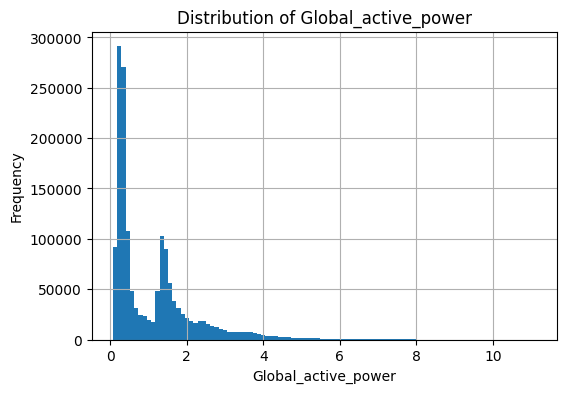

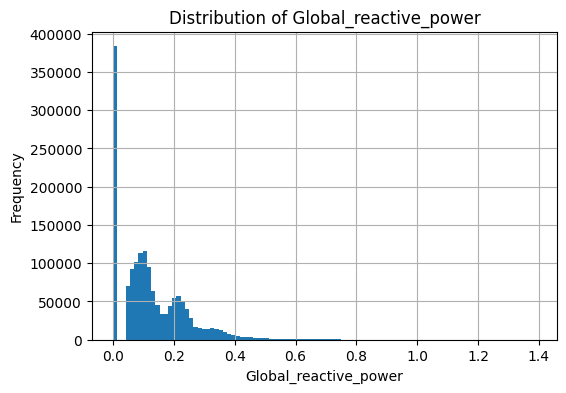

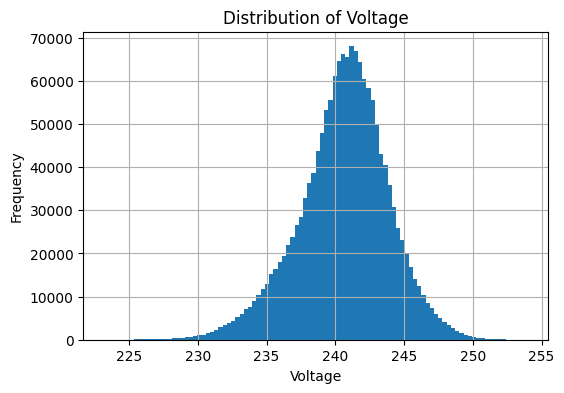

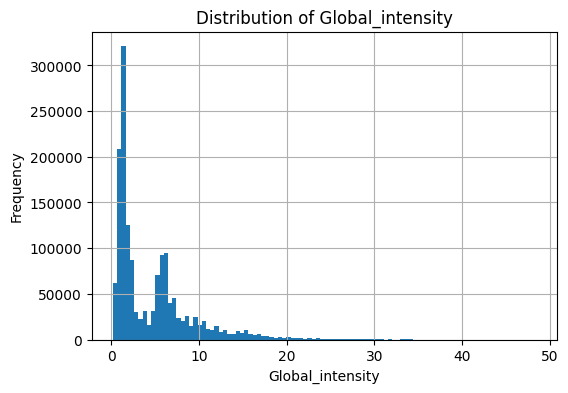

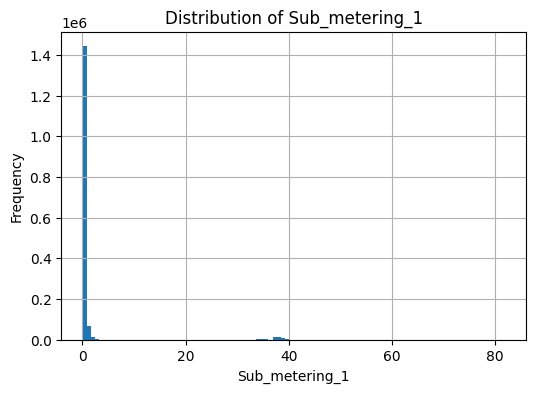

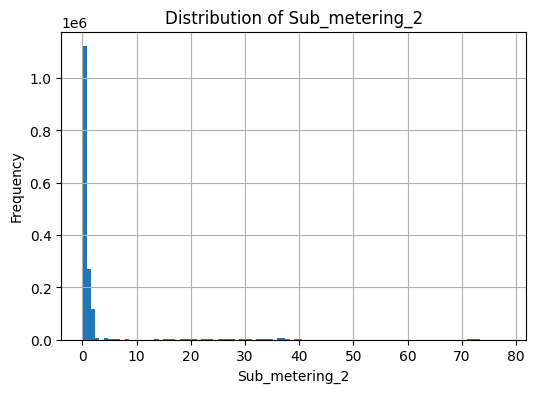

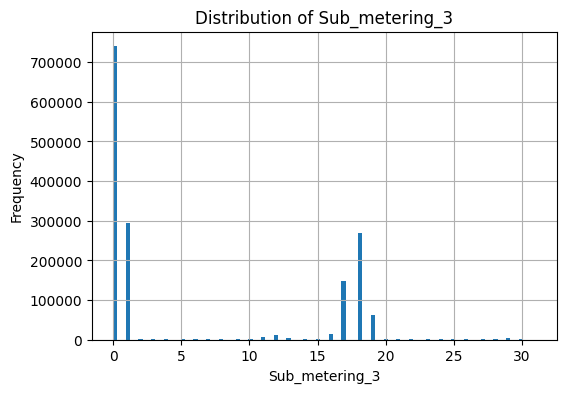

In [26]:
import matplotlib.pyplot as plt

numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=100)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Based on the validation checks, the dataset contains no logically incorrect or unrealistic values.

In [29]:
#saving the cleaned dataset to cs.
df.reset_index(drop=True, inplace=True)
df.to_csv("cleaned_household_energy.csv", index=False)
